In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.rename(columns={'Marital.Status':'Marital_Status'
                   ,'Taxable.Income':'Taxable_Income',
                   'City.Population':'City_Population',
                   'Work.Experience':'Work_Experience'},inplace=True)
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
char_col=df.select_dtypes('object').columns

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
oe=OrdinalEncoder()

In [8]:
df[char_col]=oe.fit_transform(df[char_col])
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


In [9]:
df.corr()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital_Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable_Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City_Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work_Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


<AxesSubplot:>

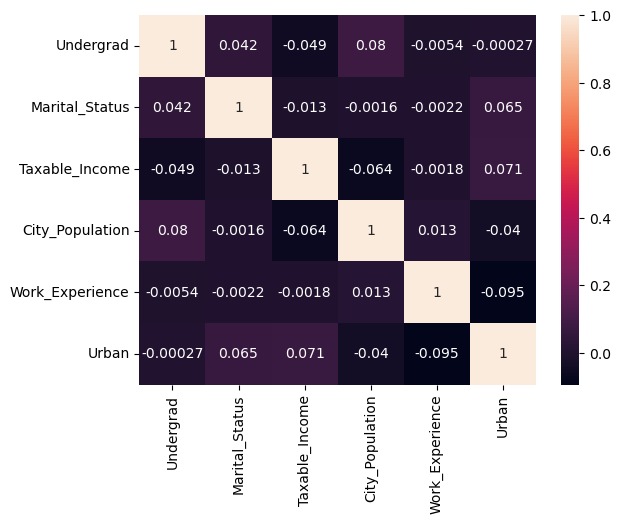

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
#taxable_income <= 30000 as Taxable_Income


In [12]:
df['tax_income']="Good"
df.loc[df['Taxable_Income']<=30000,'tax_income']='Risky'
df.drop(columns='Taxable_Income',inplace=True)
df

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,tax_income
0,0.0,2.0,50047,10,1.0,Good
1,1.0,0.0,134075,18,1.0,Good
2,0.0,1.0,160205,30,1.0,Good
3,1.0,2.0,193264,15,1.0,Good
4,0.0,1.0,27533,28,0.0,Good
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,Good
596,1.0,0.0,55369,2,1.0,Good
597,0.0,0.0,154058,0,1.0,Good
598,1.0,1.0,180083,17,0.0,Good


In [13]:
# Target = []
# for x1 in df['Taxable.Income']:
#     if x1 <= 30000:
#         Target.append("Risky")
#     else:
#         Target.append('Good')
# df['Target'] = Target
# df

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df.iloc[:,0:5]
y=df['tax_income']

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=2)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import  DecisionTreeClassifier

In [18]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.79      0.81      0.80       142
       Risky       0.23      0.21      0.22        38

    accuracy                           0.68       180
   macro avg       0.51      0.51      0.51       180
weighted avg       0.67      0.68      0.68       180



In [19]:
confusion_matrix(ytest,ypred)

array([[115,  27],
       [ 30,   8]], dtype=int64)

In [20]:
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

(1.0, 0.6833333333333333)

# hyperparameter Tunning

In [21]:
params={
    'criterion':["gini", "entropy"],
    'splitter':["best", "random"],
    'max_depth':[2,4,6,7,9,12,14]
    
}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params,verbose=-1,cv=5)

In [24]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 9, 12, 14],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [25]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}

In [26]:
dt=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.79      1.00      0.88       142
       Risky       0.00      0.00      0.00        38

    accuracy                           0.79       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.62      0.79      0.70       180



In [27]:
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

(0.7952380952380952, 0.7888888888888889)

In [29]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'Undergrad <= 0.644\ngini = 0.326\nsamples = 420\nvalue = [334, 86]\nclass = Good'),
 Text(0.25, 0.5, 'Marital_Status <= 1.056\ngini = 0.288\nsamples = 206\nvalue = [170, 36]\nclass = Good'),
 Text(0.125, 0.16666666666666666, 'gini = 0.251\nsamples = 129\nvalue = [110, 19]\nclass = Good'),
 Text(0.375, 0.16666666666666666, 'gini = 0.344\nsamples = 77\nvalue = [60, 17]\nclass = Good'),
 Text(0.75, 0.5, 'Marital_Status <= 1.125\ngini = 0.358\nsamples = 214\nvalue = [164, 50]\nclass = Good'),
 Text(0.625, 0.16666666666666666, 'gini = 0.377\nsamples = 139\nvalue = [104, 35]\nclass = Good'),
 Text(0.875, 0.16666666666666666, 'gini = 0.32\nsamples = 75\nvalue = [60, 15]\nclass = Good')]

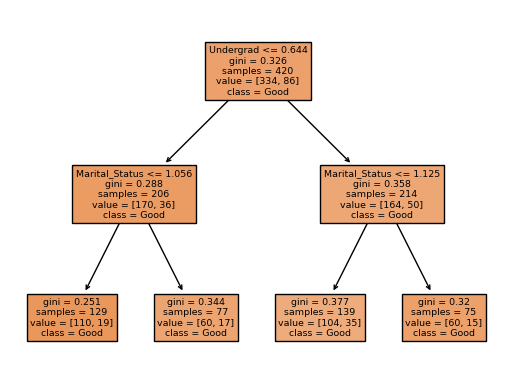

In [30]:
tree.plot_tree(dt, feature_names=x.columns,class_names=df['tax_income'].unique(),filled=True)

In [31]:
dt.feature_importances_

array([0.48201645, 0.51798355, 0.        , 0.        , 0.        ])

In [32]:
pd.DataFrame({
    'feature':x.columns,
    'IG':dt.feature_importances_
}).sort_values('IG',ascending=False)

,feature,IG
1,Marital_Status,0.517984
0,Undergrad,0.482016
2,City_Population,0.000000
3,Work_Experience,0.000000
4,Urban,0.000000
